In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=43)

In [3]:
metric = get_dst_metric(2)
kernel = triangular_window
k = 100
max_distance = max([max([metric(y, x) for x in X_train]) for y in X_train]) * 2

In [4]:
feature_names = iris['feature_names']

In [5]:
weights = remove_redundant_points(X_train, y_train, k, metric, kernel, max_distance, 30)
non_zero_ids = [i for i in range(weights.shape[0]) if weights[i] > 0]
zero_ids = [i for i in range(weights.shape[0]) if weights[i] == 0]

reduced_x = X_train[non_zero_ids]
reduced_y = y_train[non_zero_ids]
reduced_weights = weights[non_zero_ids]

print(weights)
print(non_zero_ids)
print(reduced_y)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 2. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0, 8, 9, 10, 12, 13, 14, 15, 16, 27, 28, 33, 38, 75, 76, 78, 79, 83, 91, 93, 95]
[1 2 0 2 0 1 2 1 0 2 1 0 0 2 1 2 1 0 2 0 1]


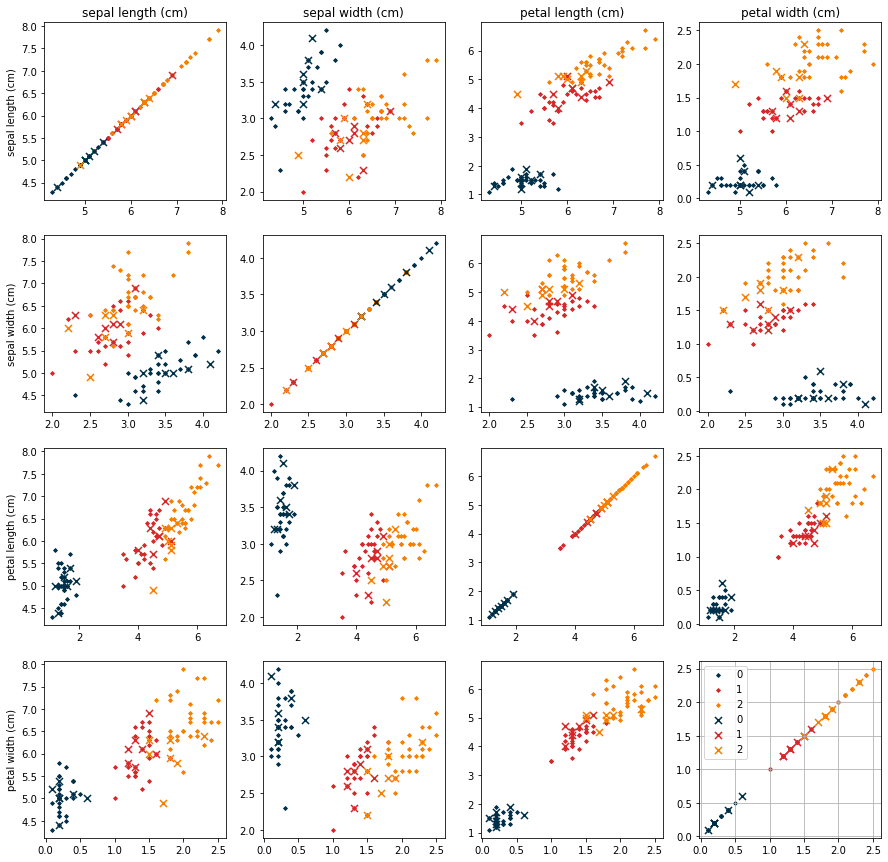

In [6]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):                
        scatter_markers(ax[i, j], X_train[zero_ids][:, i], X_train[zero_ids][:, j], y_train[zero_ids], 7, 'D')
        scatter_markers(ax[i, j], X_train[non_zero_ids][:, i], X_train[non_zero_ids][:, j], y_train[non_zero_ids], 50, 'x')
        if i == 0:
            ax[i, j].set_title(feature_names[j])
        if j == 0:
            ax[i, j].set_ylabel(feature_names[i])
            
plt.legend()
plt.grid()
plt.show()